# QF 627 Programming and Computational Finance
## Problem-Sets for Exercise `9` | `Questions`

> Hi, Team. 👋

> The problem sets were originally prepared for use in supervised learning of classification problems and hierarchical risk parity algorithms, and to practice the application of unsupervised learning on portfolio management.

> As we have not completed our lessons on the above subjects, and will continue to discuss them in next week's lesson, the problem sets have been rewritten. 

> After re-reading your submissions to date, some of the questions here are asked in order to assess your understanding of the course content.

> I hope the exercise questions below will aid your revision of the course content 🤞

#### <font color = "green"> Please submit your answers via the eLearn submission folder. Again, you may submit incomplete answers. (Answer as fully as you can. This will help me to see where you stand.)

### For standardization of your answers…

> Please execute the lines of code below before you start work on your answers.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

from pandas_datareader import data as pdr

import datetime as dt
import yfinance as yf

> Let's set some print option.

In [2]:
np.set_printoptions(precision = 3)

plt.style.use("ggplot")

mpl.rcParams["axes.grid"] = True
mpl.rcParams["grid.color"] = "grey"
mpl.rcParams["grid.alpha"] = 0.25

mpl.rcParams["axes.facecolor"] = "white"

mpl.rcParams["legend.fontsize"] = 14

%matplotlib inline

## 👇 <font color = "purple"> Bigger Question 1. 
    
### The first question is to look for clusters of correlations using the agglomerate hierarchical clustering technique (AGNES).
    
### <font color = green> Using the 102 tickers below, and what you have learned in class, run the analysis and develop a dendrogram. Make sure to employ the inclusion criterion of less than 30% of missing values.
    
    According to the dendrogram, which of the stocks are most correlated? 
    
    Also based on the dendrogram, please identify two stocks that are not well correlated.

In [3]:
nasdaq100_components = pd.read_html("https://en.wikipedia.org/wiki/Nasdaq-100")[4]

nasdaq100_components

Company Ticker             GICS Sector  \
0          Activision Blizzard   ATVI  Communication Services   
1                   Adobe Inc.   ADBE  Information Technology   
2                          ADP    ADP  Information Technology   
3                       Airbnb   ABNB  Consumer Discretionary   
4             Align Technology   ALGN             Health Care   
..                         ...    ...                     ...   
97    Walgreens Boots Alliance    WBA        Consumer Staples   
98               Workday, Inc.   WDAY  Information Technology   
99                 Xcel Energy    XEL               Utilities   
100  Zoom Video Communications     ZM  Information Technology   
101                    Zscaler     ZS  Information Technology   

                         GICS Sub-Industry  
0           Interactive Home Entertainment  
1                     Application Software  
2    Data Processing & Outsourced Services  
3       Internet & Direct Marketing Retail  
4                     Health Care Supplies  
..                                     ...  
97                             Drug Retail  
98                    Application Software  
99                         Multi-Utilities  
100                   Application Software  
101                   Application Software  

[102 rows x 4 columns]

### Below are the lines of code that lead to an answer:

In [4]:
ticker = nasdaq100_components['Ticker'].values.tolist()

In [5]:
dataframe = pdr.DataReader(ticker, 'yahoo', dt.datetime(2010, 1, 1), dt.datetime(2019, 12, 31))['Close']

/Users/irenewang/opt/anaconda3/lib/python3.9/site-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'ABNB', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/Users/irenewang/opt/anaconda3/lib/python3.9/site-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'CSCO', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/Users/irenewang/opt/anaconda3/lib/python3.9/site-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'CEG', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/Users/irenewang/opt/anaconda3/lib/python3.9/site-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'COST', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/Users/irenewang/opt/anaconda3/lib/python3.9/site-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'CRWD', replacing with NaN.
  warnings.warn(msg.format(sy

In [6]:
dataframe

Symbols          ATVI        ADBE         ADP        ALGN      GOOGL  \
Date                                                                   
2009-12-31  11.110000   36.779999   37.594379   17.820000  15.515015   
2010-01-04  11.300000   37.090000   37.603161   18.500000  15.684434   
2010-01-05  11.320000   37.700001   37.401230   18.010000  15.615365   
2010-01-06  11.260000   37.619999   37.313435   17.480000  15.221722   
2010-01-07  10.990000   36.889999   37.295876   17.430000  14.867367   
...               ...         ...         ...         ...        ...   
2019-12-24  58.810001  329.640015  169.910004  277.890015  67.221497   
2019-12-26  58.889999  331.200012  170.350006  278.260010  68.123497   
2019-12-27  59.189999  330.790009  170.770004  277.640015  67.732002   
2019-12-30  58.880001  328.339996  169.589996  275.630005  66.985497   
2019-12-31  59.419998  329.809998  170.500000  279.040009  66.969498   

Symbols          GOOG       AMZN        AMD        AEP        AMGN  ...  \
Date                                                                ...   
2009-12-31  15.441621   6.726000   9.680000  34.790001   56.570000  ...   
2010-01-04  15.610239   6.695000   9.700000  34.939999   57.720001  ...   
2010-01-05  15.541497   6.734500   9.710000  34.540001   57.220001  ...   
2010-01-06  15.149715   6.612500   9.570000  34.889999   56.790001  ...   
2010-01-07  14.797037   6.500000   9.470000  35.189999   56.270000  ...   
...               ...        ...        ...        ...         ...  ...   
2019-12-24  67.178001  89.460503  46.540001  93.839996  242.330002  ...   
2019-12-26  68.019997  93.438499  46.630001  93.879997  241.899994  ...   
2019-12-27  67.594498  93.489998  46.180000  94.190002  241.529999  ...   
2019-12-30  66.806999  92.344498  45.520000  94.029999  240.270004  ...   
2019-12-31  66.850998  92.391998  45.860001  94.510002  241.070007  ...   

Symbols           XEL         ZM         ZS  ABNB  CSCO  CEG  COST  CRWD  \
Date                                                                       
2009-12-31  21.219999        NaN        NaN   NaN   NaN  NaN   NaN   NaN   
2010-01-04  21.080000        NaN        NaN   NaN   NaN  NaN   NaN   NaN   
2010-01-05  20.830000        NaN        NaN   NaN   NaN  NaN   NaN   NaN   
2010-01-06  20.870001        NaN        NaN   NaN   NaN  NaN   NaN   NaN   
2010-01-07  20.780001        NaN        NaN   NaN   NaN  NaN   NaN   NaN   
...               ...        ...        ...   ...   ...  ...   ...   ...   
2019-12-24  62.860001  66.459999  47.740002   NaN   NaN  NaN   NaN   NaN   
2019-12-26  62.790001  67.449997  48.160000   NaN   NaN  NaN   NaN   NaN   
2019-12-27  63.119999  66.639999  47.610001   NaN   NaN  NaN   NaN   NaN   
2019-12-30  63.290001  66.790001  46.500000   NaN   NaN  NaN   NaN   NaN   
2019-12-31  63.490002  68.040001  46.500000   NaN   NaN  NaN   NaN   NaN   

Symbols     DLTR  LCID  
Date                    
2009-12-31   NaN   NaN  
2010-01-04   NaN   NaN  
2010-01-05   NaN   NaN  
2010-01-06   NaN   NaN  
2010-01-07   NaN   NaN  
...          ...   ...  
2019-12-24   NaN   NaN  
2019-12-26   NaN   NaN  
2019-12-27   NaN   NaN  
2019-12-30   NaN   NaN  
2019-12-31   NaN   NaN  

[2517 rows x 102 columns]

### Prepare Data

In [7]:
print("Missing Value =", dataframe.isnull().values.any())

Missing Value = True


In [8]:
missing_fraction = dataframe.isnull().mean().sort_values(ascending=False)

In [9]:
drop_list = sorted(list(missing_fraction[missing_fraction > 0.3].index))

In [10]:
dataframe.drop(labels = drop_list, 
              axis = 1, 
              inplace = True)

In [11]:
dataframe = dataframe.fillna(method = 'ffill')

### Data Transformation

In [12]:
returns = dataframe.pct_change().mean() * 252
returns = pd.DataFrame(returns)
returns.columns = ['Return']
returns['Volatility'] = dataframe.pct_change().std()*np.sqrt(252)
data = returns

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler().fit(data)

In [15]:
rescaleDataFrame = pd.DataFrame(scaler.fit_transform(data), columns = data.columns, index = data.index)
rescaleDataFrame.head(5)

Return  Volatility
Symbols                      
ATVI    -0.232017   -0.047798
ADBE     0.292392   -0.271941
ADP     -0.744393   -1.364452
ALGN     1.420761    1.131283
GOOGL   -0.652872   -0.679354

In [16]:
X = rescaleDataFrame

In [17]:
from scipy.cluster.hierarchy import dendrogram, linkage, ward

In [18]:
Z = linkage(X, method = 'ward')
Z[0]

array([1.200e+01, 3.700e+01, 8.475e-03, 2.000e+00])

### <font color = red> Answer 1 is presented in the cell below: </font>

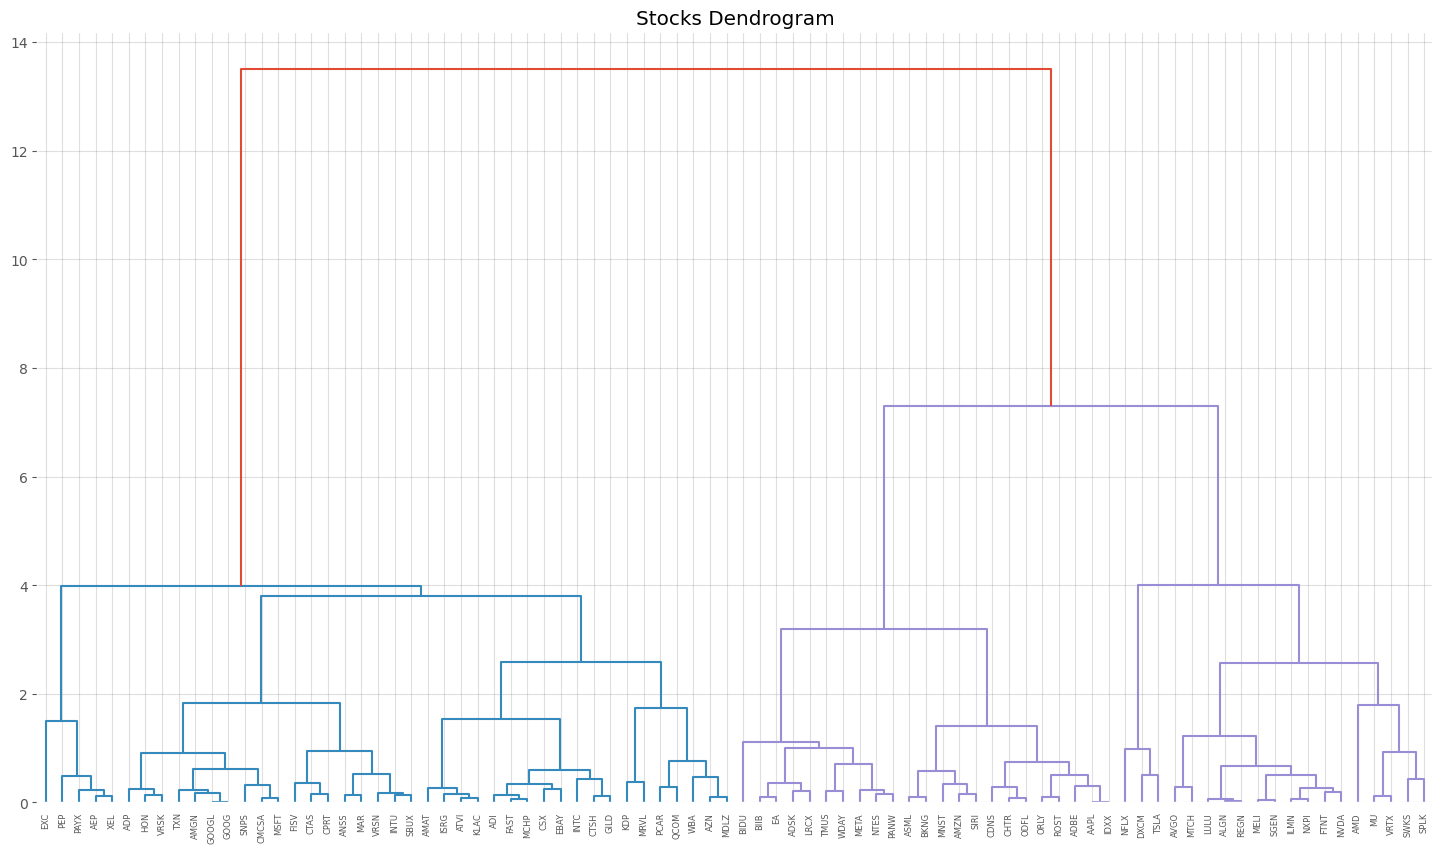

In [19]:
plt.figure(figsize = (18, 10))
plt.title("Stocks Dendrogram")
dendrogram(Z, labels = X.index)
plt.show()

If the distance between two cluster is shorter, then the two stock would have higher correlation. 

on the other hands, if the distance between two cluster is longer, then the two ctock have less correlation.

## 👇 <font color = "purple"> Bigger Question 2. ### 

### The second question asks you to run a principal components analysis (PCA) for portfolio management. Begin your analysis with all the above stocks. Make sure to employ the inclusion criterion of less than 30% of missing values.
    
    Your objective is to find the portfolio using PCA.
    
    Select and normalize the four largest components and use them as weights for 
    portfolios that you can compare to an equal-weighted portfolio comprising all stocks.
    
    Identify the profile of the portfolio based on the portfolio weights.
    
    When comparing the performance of each portfolio over the sample period 
    to "the market", assess the performance of other portfolios that capture different 
    return patterns.
    
> Please use 75% of your data for PCA and 25% for backtesting.    
    
### <font color = "green"> NOTE: The investment horizon will be 10 years between 2010 and 2019.

### Below are the lines of code that lead to an answer:

In [20]:
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

from numpy.linalg import inv, eig, svd

from sklearn.manifold import TSNE

from sklearn.decomposition import KernelPCA

In [21]:
from sklearn.preprocessing import StandardScaler

from pandas.plotting import scatter_matrix
import seaborn as sns

In [22]:
daily_linear_return = np.log(dataframe / dataframe.shift(1))

daily_linear_returns = dataframe.pct_change(1)

In [23]:
daily_linear_returns = \
    daily_linear_returns[ \
         daily_linear_returns.apply(lambda x:(x - x.mean()
                                             ).abs() < (3 * x.std()
                                                       )
                                   ).all(1)
                        ]

In [24]:
scaler = StandardScaler().fit(daily_linear_returns)


In [25]:
scaled_df = pd.DataFrame(scaler.fit_transform(daily_linear_returns),
                          columns = daily_linear_returns.columns,
                          index = daily_linear_returns.index)

In [26]:
daily_linear_returns.dropna(how = "any",
                            inplace = True)

scaled_df.dropna(how = "any",
                  inplace = True)

scaled_df 

Symbols         ATVI      ADBE       ADP      ALGN     GOOGL      GOOG  \
Date                                                                     
2012-10-15  0.834173  0.873418  1.044599  0.399795 -0.567112 -0.565236   
2012-10-16 -0.511244  2.182894  0.519252  2.205574  0.378778  0.381761   
2012-11-05  0.465685 -0.488260 -1.986028  0.422683 -0.768641 -0.766986   
2012-11-06  0.461263  0.230079  1.719501 -0.539869 -0.262543 -0.260306   
2012-11-07 -1.356269 -2.327997 -1.948878 -0.919142 -2.101424 -2.101295   
...              ...       ...       ...       ...       ...       ...   
2019-12-24 -0.180147  0.042477 -0.162474 -0.174410 -0.522877 -0.457442   
2019-12-26  0.006188  0.258973  0.200493 -0.037852  1.166649  1.087451   
2019-12-27  0.262106 -0.231593  0.186574 -0.255801 -0.631357 -0.677321   
2019-12-30 -0.446000 -0.738449 -0.864826 -0.562651 -1.126204 -1.184027   
2019-12-31  0.541531  0.237991  0.511837  0.638131 -0.114617 -0.027919   

Symbols         AMZN       AMD       AEP      AMGN  ...      SNPS      TMUS  \
Date                                                ...                       
2012-10-15  0.446292  0.065564  0.893877  2.055113  ...  0.143578 -3.269181   
2012-10-16 -0.198853 -0.992398  0.036125  1.624237  ...  1.941900 -1.956297   
2012-11-05  0.500109  0.105995 -1.948602 -0.179155  ... -1.012885 -0.943769   
2012-11-06  0.922953 -0.756220 -0.523295  0.796240  ...  0.341350  0.836747   
2012-11-07 -1.882999 -1.120752 -3.296391 -1.894842  ... -2.669850 -2.508743   
...              ...       ...       ...       ...  ...       ...       ...   
2019-12-24 -0.284763  0.796491  0.017956 -0.318755  ... -1.426242  0.265107   
2019-12-26  3.253838  0.003192 -0.041372 -0.229190  ...  1.319157  0.012514   
2019-12-27 -0.082316 -0.417907  0.278321 -0.209351  ...  0.297340 -0.202557   
2019-12-30 -1.054992 -0.586627 -0.277595 -0.507994  ... -1.282429  0.694809   
2019-12-31 -0.085109  0.204410  0.478710  0.184214  ... -0.046545  0.242691   

Symbols         TSLA       TXN      VRSN      VRSK      VRTX       WBA  \
Date                                                                     
2012-10-15 -0.560507  3.011902  0.379073 -0.167527 -0.340766  0.453118   
2012-10-16  0.968324  1.524175  0.593025  0.871563 -0.008554  0.383094   
2012-11-05  3.487755  2.874825  1.048386  0.364147  1.567950 -1.930338   
2012-11-06 -0.556278  1.331336  0.751781  1.366243 -0.350421 -0.392541   
2012-11-07  0.396294 -2.087960 -0.238893 -2.030831 -0.759757 -1.247551   
...              ...       ...       ...       ...       ...       ...   
2019-12-24  0.471424 -0.130872  0.082710 -0.359505  0.080160 -0.364223   
2019-12-26  0.430973 -0.152066  0.397270 -0.329782 -0.131091  0.696684   
2019-12-27 -0.160779 -0.053131  0.091452 -0.261704  0.113211  0.102045   
2019-12-30 -1.577016 -0.759395 -0.915382 -0.858183 -0.530664 -0.211919   
2019-12-31  0.244453  0.331334  0.097574  1.306706 -0.062410  0.006386   

Symbols         WDAY       XEL  
Date                            
2012-10-15  3.643183  0.417312  
2012-10-16  0.185273  0.294461  
2012-11-05  1.501437 -1.668670  
2012-11-06 -1.535030 -0.108415  
2012-11-07 -0.584625 -2.220590  
...              ...       ...  
2019-12-24  0.144701 -0.351302  
2019-12-26 -0.325283 -0.192153  
2019-12-27  0.114889  0.519028  
2019-12-30 -0.719410  0.232925  
2019-12-31  0.156922  0.285043  

[999 rows x 84 columns]

In [27]:
prop = int(len(scaled_df) * 0.75)

X_Train = scaled_df[:prop]

X_Test = scaled_df[prop:]

X_Train_Raw = daily_linear_returns[:prop]

X_Test_Raw = daily_linear_returns[prop:]

In [28]:
stock_tickers = scaled_df.columns.values

n_tickers = len(stock_tickers)

In [29]:
pca = PCA()

PrincipalComponent = pca.fit(X_Train)

In [30]:
PrincipalComponent

PCA()

In [31]:
pca.components_[0]

array([-0.104, -0.131, -0.136, -0.097, -0.132, -0.132, -0.12 , -0.077,
       -0.064, -0.116, -0.128, -0.136, -0.098, -0.123, -0.116, -0.098,
       -0.132, -0.104, -0.108, -0.127, -0.121, -0.118, -0.084, -0.127,
       -0.13 , -0.108, -0.111, -0.111, -0.09 , -0.119, -0.107, -0.067,
       -0.097, -0.144, -0.111, -0.108, -0.14 , -0.103, -0.102, -0.112,
       -0.125, -0.092, -0.074, -0.122, -0.121, -0.063, -0.125, -0.093,
       -0.084, -0.099, -0.102, -0.124, -0.108, -0.124, -0.102, -0.071,
       -0.073, -0.081, -0.099, -0.117, -0.092, -0.112, -0.134, -0.1  ,
       -0.124, -0.089, -0.107, -0.089, -0.091, -0.089, -0.105, -0.127,
       -0.116, -0.122, -0.126, -0.08 , -0.07 , -0.138, -0.118, -0.119,
       -0.108, -0.094, -0.112, -0.058])

In [32]:
def PCWeights():
    """
    Principal Compoments Weights
    """
    weights = pd.DataFrame()
    
    for i in range(len(pca.components_)):
        weights["weights_{}".format(i)] = pca.components_[i] / sum(pca.components_[i]
                                                                   )
        
    weights = weights.values.T
    return weights

weights = PCWeights()

In [33]:
weights = PCWeights()

portfolio = pd.DataFrame()

def VisualizeEigen(weights,
                   plot = False,
                   portfolio = portfolio):
    
    portfolio = pd.DataFrame(data = {"weights": weights.squeeze()*100},
                             index = stock_tickers)
    
    portfolio.sort_values(by = ["weights"],
                          ascending = False,
                          inplace = True)
    
    if plot:
        
        print("Total weights of our Eigen-Portfolio: %2.f" % np.sum(portfolio)
             )
        
        portfolio.plot(figsize = (14, 10),
                       title = "Eigen-Portfolio Weights",
                       rot = 60,
                       xticks = range(0, len(stock_tickers), 1)
                      )
        
        plt.show()
        
    return portfolio

Total weights of our Eigen-Portfolio: 100


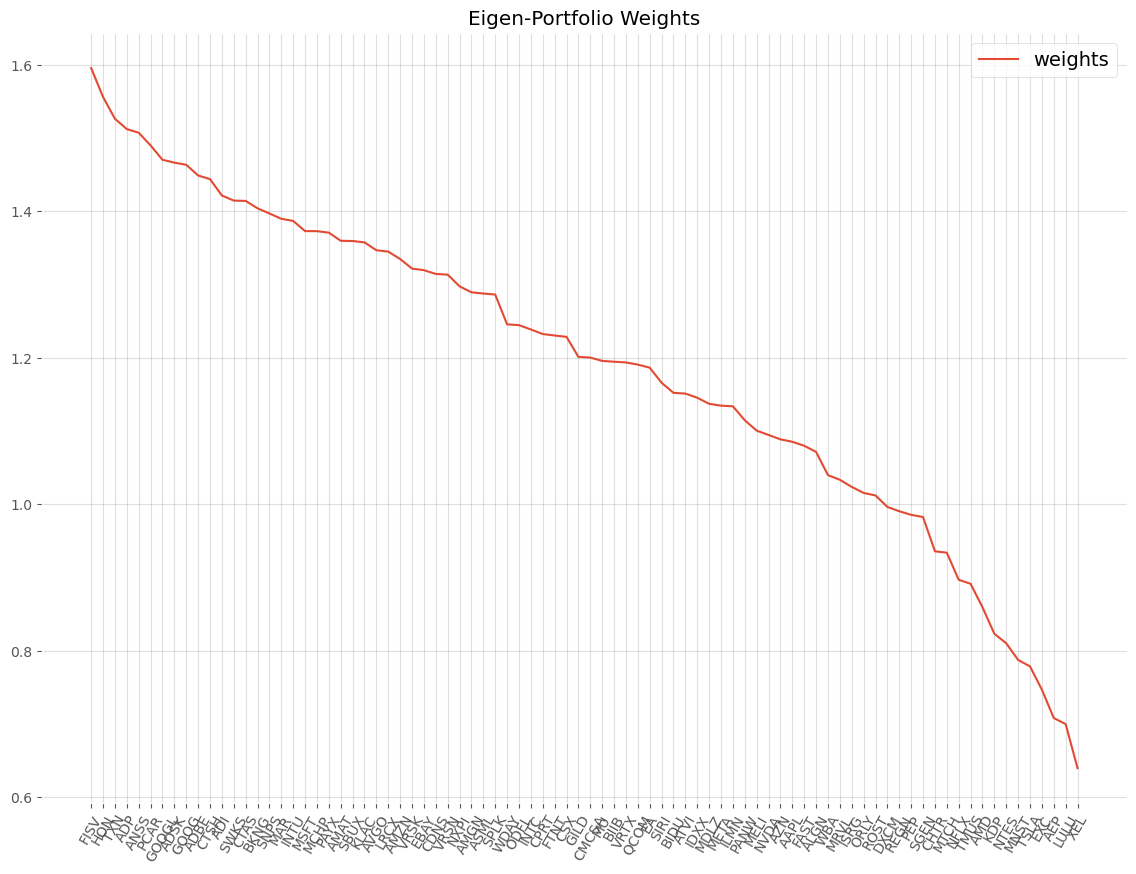

weights
FISV  1.595602
HON   1.556176
TXN   1.526466
ADP   1.512340
ANSS  1.507373
...        ...
TSLA  0.778803
EXC   0.747124
AEP   0.708290
LULU  0.700093
XEL   0.639948

[84 rows x 1 columns]

In [34]:
VisualizeEigen(weights = weights[0],
               plot = True)

### <font color = red> Answer 2 is presented in the cell below: </font>

### <font color = blue> 👉 Questions 3. Using `pandas.datareader`, extract the stock prices of the following ticker symbols, between July 2015 and June 2019.

- General Motors `GM`
- Marriott `MAR`
- Pfizer `PFE`
- ExxonMobil `XOM`
- The Walt Disney Company `DIS`
- Bank of America `BAC`
- Proctor & Gamble `PG`
- Hilton `HLT`
- Walmart `WMT`
- Twitter `TWTR`

### Then, calculate simple daily percentage changes in the stock prices, and store them into an object, printing the results into an output cell.

### Below are the lines of code that lead to an answer:

In [68]:
ticker = ['GM', 'MAR', 'PFE', 'XOM', 'DIS', 'BAC', 'PG', 'HLT', 'WMT', 'TWTR']


In [66]:
dataframe = pdr.DataReader(ticker, 'yahoo', dt.datetime(2015, 7, 1), dt.datetime(2019, 7, 1))['Close']


/Users/irenewang/opt/anaconda3/lib/python3.9/site-packages/pandas_datareader/base.py:272: SymbolWarning:

Failed to read symbol: 'PFE', replacing with NaN.



### <font color = red> Answer 3 is presented in the cell below: </font>

In [67]:
simple_daily_pct_change = dataframe.pct_change()
simple_daily_pct_change


Symbols           GM       MAR       XOM       DIS       BAC        PG  \
Date                                                                     
2015-06-30       NaN       NaN       NaN       NaN       NaN       NaN   
2015-07-01 -0.008701  0.008066 -0.009976  0.008674  0.011751  0.018916   
2015-07-02  0.005751 -0.002534  0.009348 -0.001390 -0.011034  0.002634   
2015-07-06 -0.017454 -0.006551 -0.007337  0.006349 -0.005285  0.001501   
2015-07-07  0.006432  0.015207  0.004120  0.012100 -0.014758  0.020862   
...              ...       ...       ...       ...       ...       ...   
2019-06-25  0.019481 -0.025446 -0.008837  0.005172 -0.007863 -0.005430   
2019-06-26  0.011943  0.017782  0.004327  0.003287  0.005403 -0.017812   
2019-06-27  0.004983  0.019462 -0.010183 -0.007835  0.010749  0.000456   
2019-06-28  0.005480  0.014462  0.010683  0.002441  0.028004 -0.001184   
2019-07-01  0.005710  0.006700 -0.000913  0.014394  0.014483  0.007661   

Symbols          HLT       WMT      TWTR  PFE  
Date                                           
2015-06-30       NaN       NaN       NaN  NaN  
2015-07-01  0.008348  0.013393 -0.022639  NaN  
2015-07-02  0.000000 -0.000278  0.009040  NaN  
2015-07-06  0.000720  0.009324 -0.008119  NaN  
2015-07-07  0.001799  0.017372  0.002540  NaN  
...              ...       ...       ...  ...  
2019-06-25 -0.023662 -0.004675 -0.024171  NaN  
2019-06-26  0.013619 -0.005058  0.014401  NaN  
2019-06-27  0.021265 -0.000545 -0.013345  NaN  
2019-06-28  0.012535  0.003542  0.004317  NaN  
2019-07-01  0.015961  0.001177  0.033811  NaN  

[1008 rows x 10 columns]

### <font color = blue> 👉 Questions 4. Using a box-and-whisker plot, compare the performance of the stocks over the given period of time. Find the stock with the highest variability and risk, based on the visualization.

### Below are the lines of code that lead to an answer:

### <font color = red> Answer 4 is presented in the cell below: </font>

<AxesSubplot:>

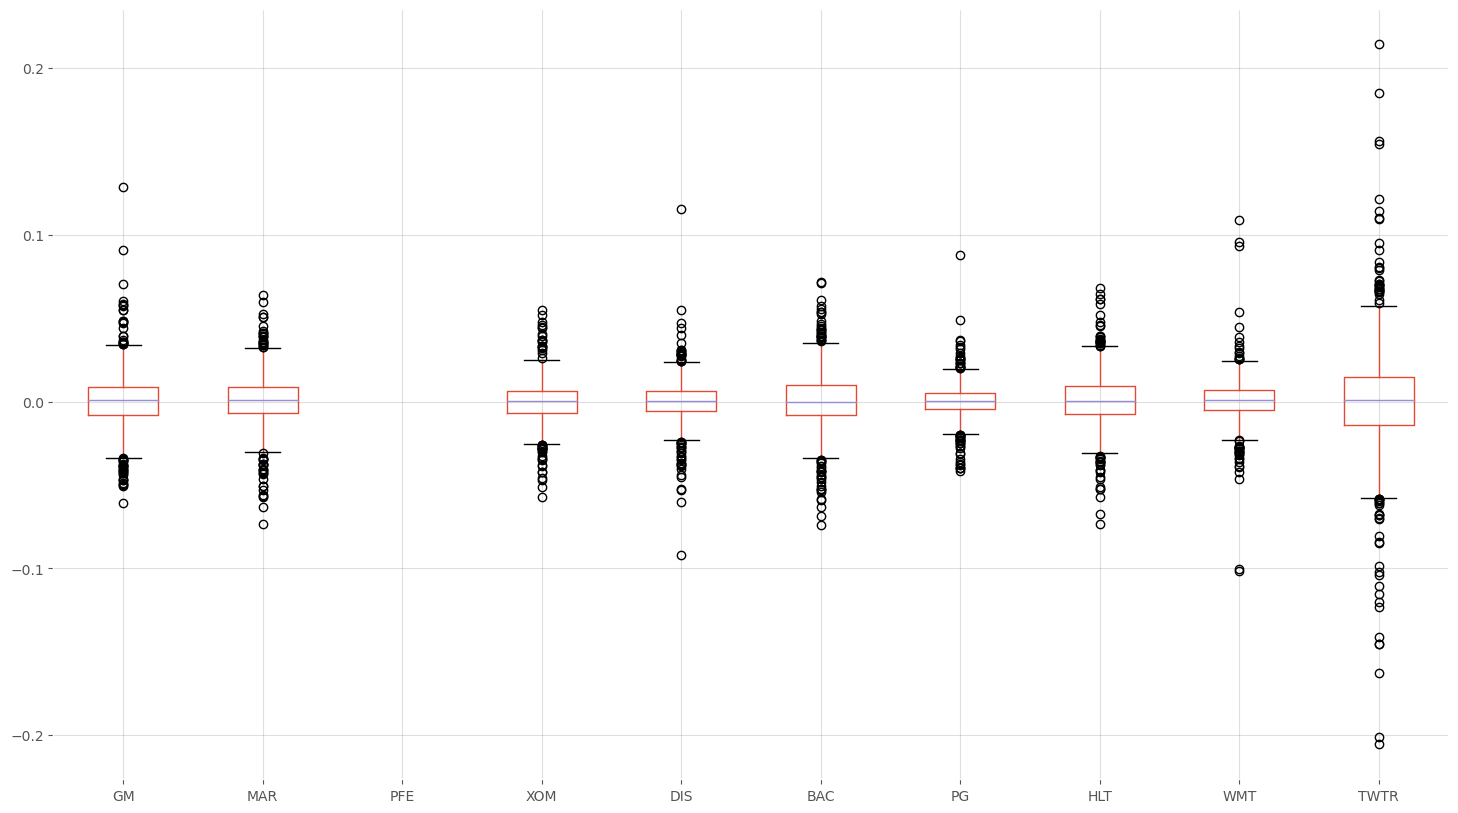

In [69]:
plt.figure(figsize = (18, 10))
simple_daily_pct_change.boxplot(column = ticker)

### <font color = blue> 👉 Questions 5. Create your own function to compare daily percentage changes between stocks, using a scatter plot and its distribution relative to a perfect diagonal (regression line). 

### Assess which of the following pairs seem to show the closest relationships.

1. ExxonMobil (`XOM`) and General Motors (`GM`)
2. Twitter (`TWTR`) and The Walt Disney Company (`DIS`)
3. Marriott (`MAR`) and Hilton (`HLT`)
4. Pfeizer (`PFE`) and Proctor & Gamble (`PG`)
5. Bank of America (`BAC`) and Walmart (`WMT`)

### Upon completion of the above, please execute more tasks for the sake of this question. 

### As you have learned in class, if you wish to look for all combinations of stocks you can use the scatter matrix graph provided by the `pandas` module. Create the scatter matrix, along with a Kernel Density Estimation on the diagonal.

### Below are the lines of code that lead to an answer:

In [39]:
def scatter_plot(ticker1, ticker2):
    f = plt.figure(figsize = (18, 10))
    ax = f.add_subplot(111)
    ax.scatter(simple_daily_pct_change[ticker1], simple_daily_pct_change[ticker2])
    ax.set_xlabel(ticker1)
    ax.set_ylabel(ticker2)
    plt.show()

<Figure size 1600x1000 with 0 Axes>

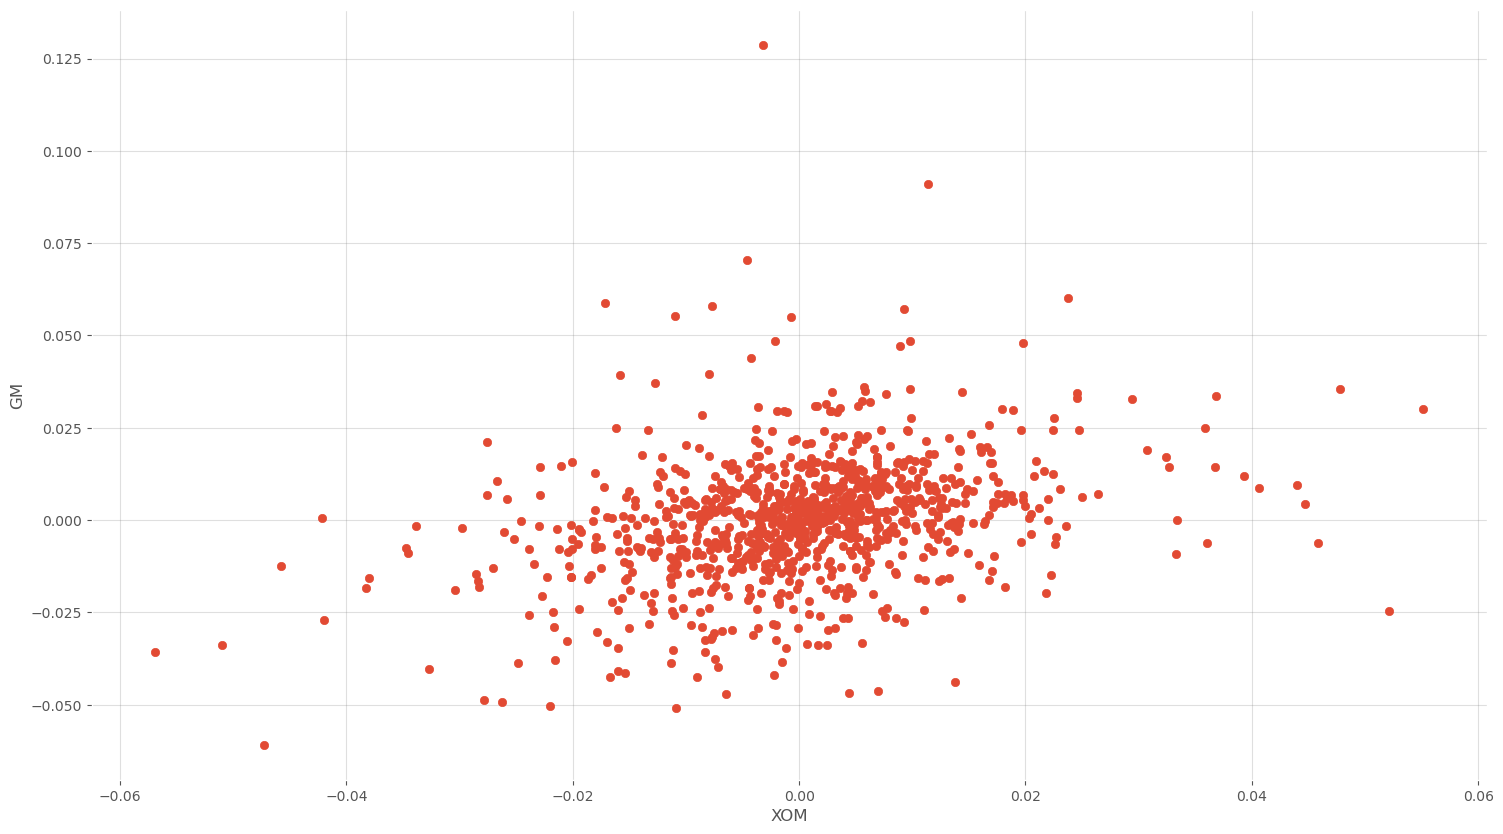

In [40]:
# stock of XOM and GM
plt.figure(figsize = (16, 10))
scatter_plot('XOM', 'GM')
plt.show()

<Figure size 1600x1000 with 0 Axes>

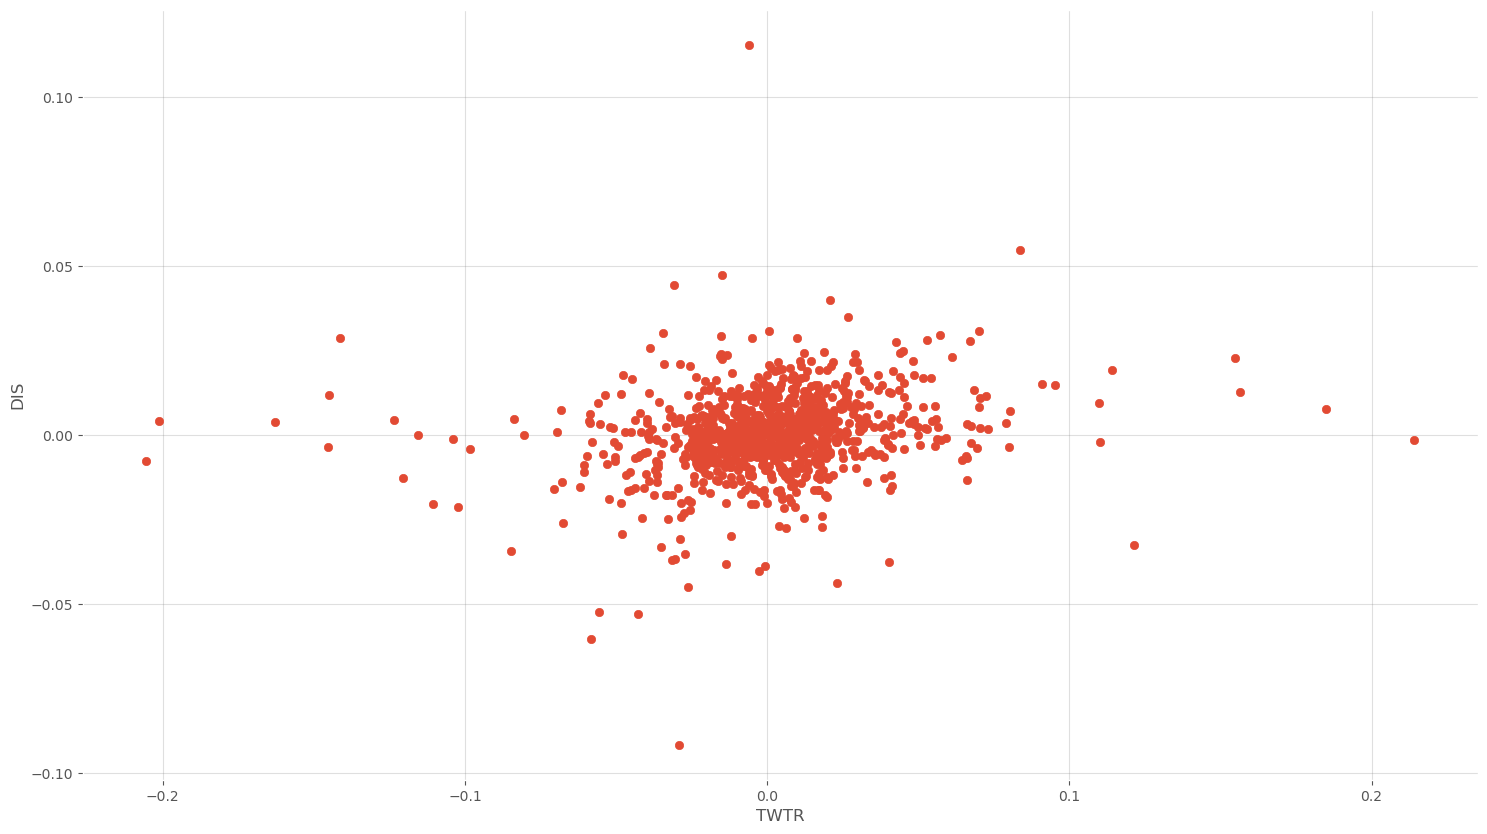

In [41]:
# stock of TWTR and DIS
plt.figure(figsize = (16, 10))
scatter_plot('TWTR', 'DIS')
plt.show()

<Figure size 1600x1000 with 0 Axes>

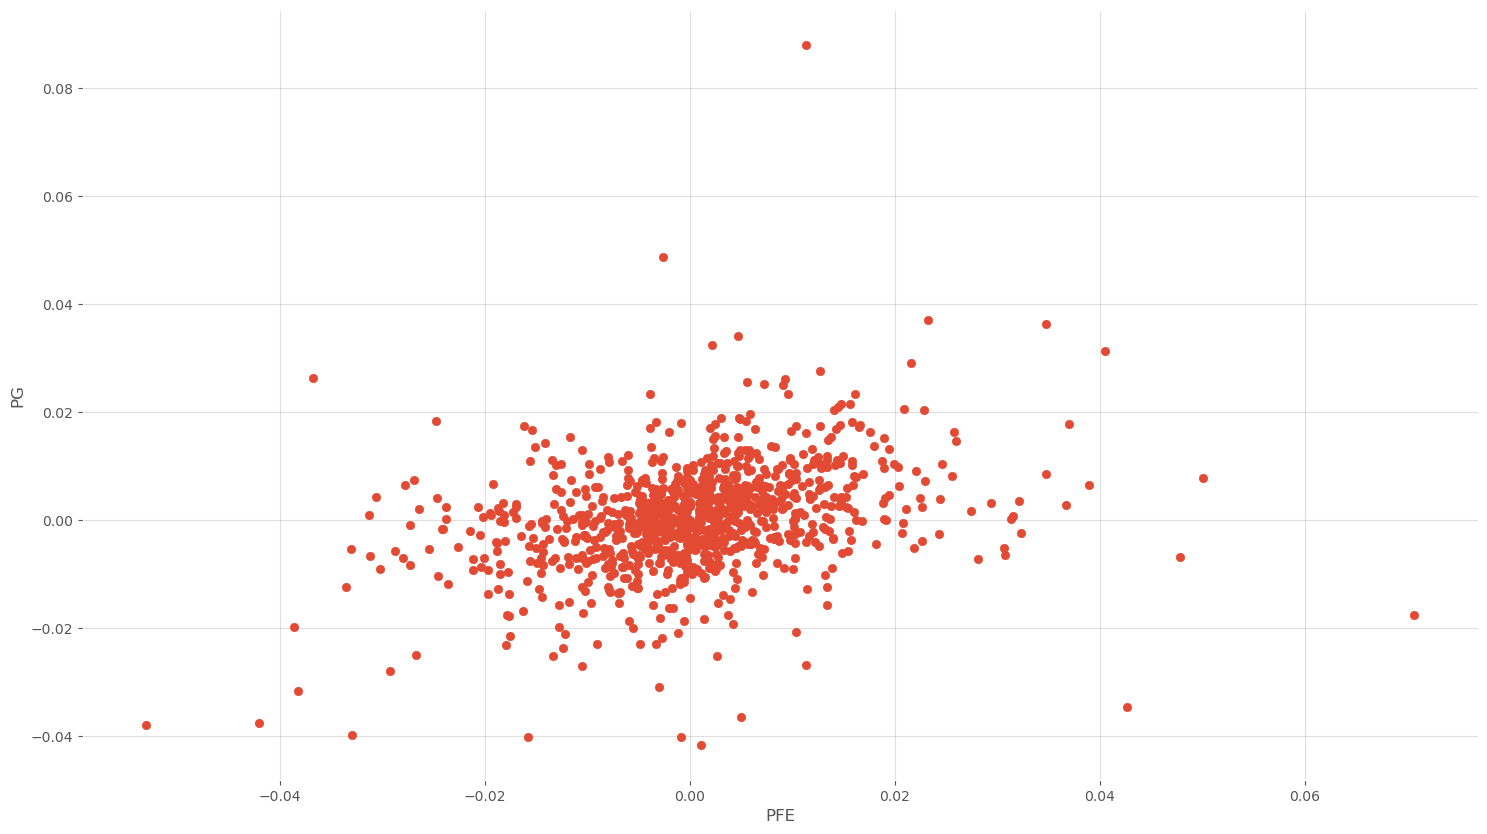

In [42]:
# stock of PFE and PG
plt.figure(figsize = (16, 10))
scatter_plot('PFE', 'PG')
plt.show()

<Figure size 1600x1000 with 0 Axes>

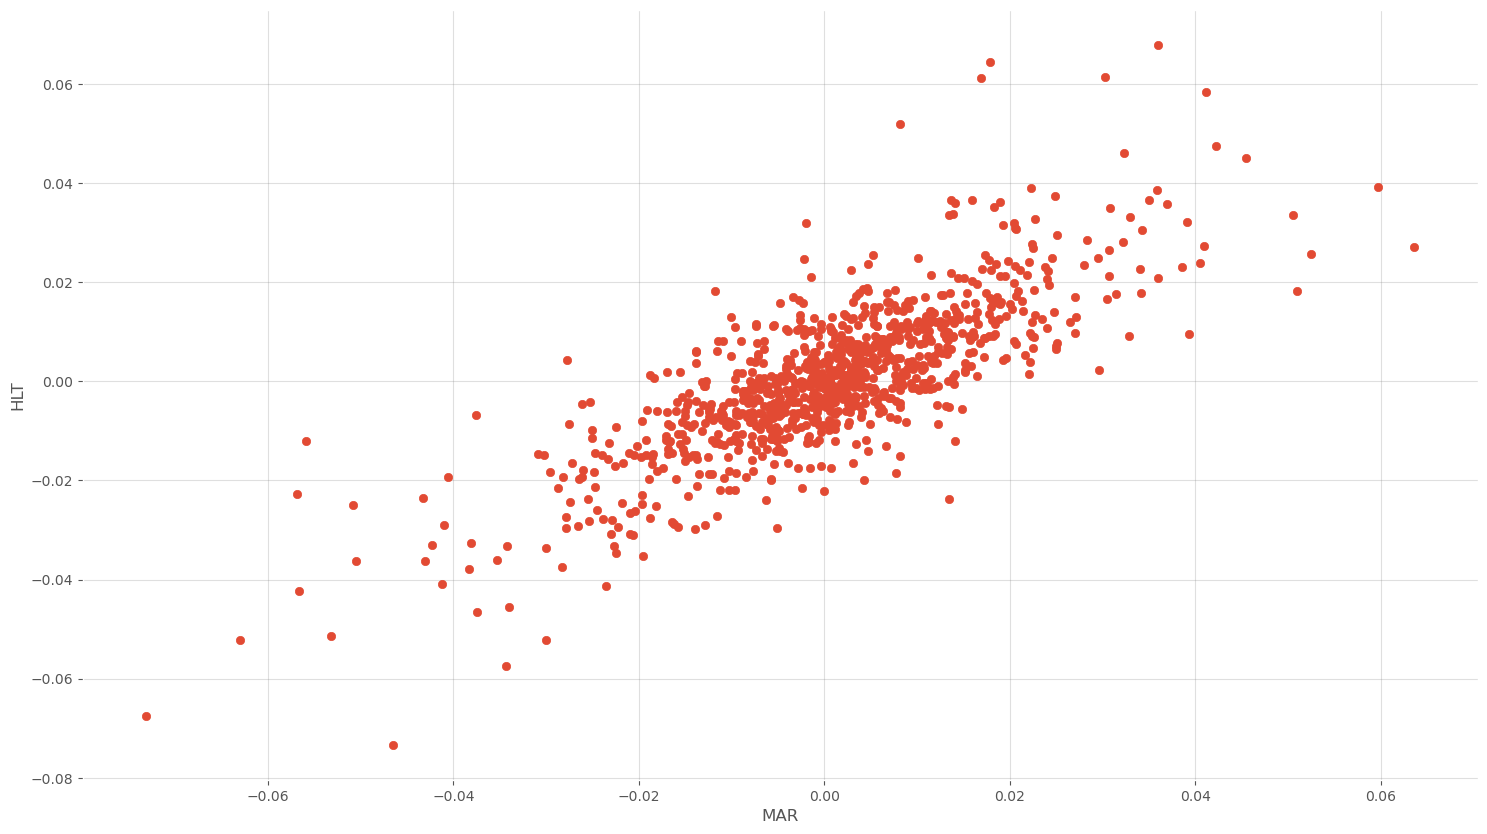

In [43]:
# stock of MAR and HLT
plt.figure(figsize = (16, 10))
scatter_plot('MAR', 'HLT')
plt.show()

<Figure size 1600x1000 with 0 Axes>

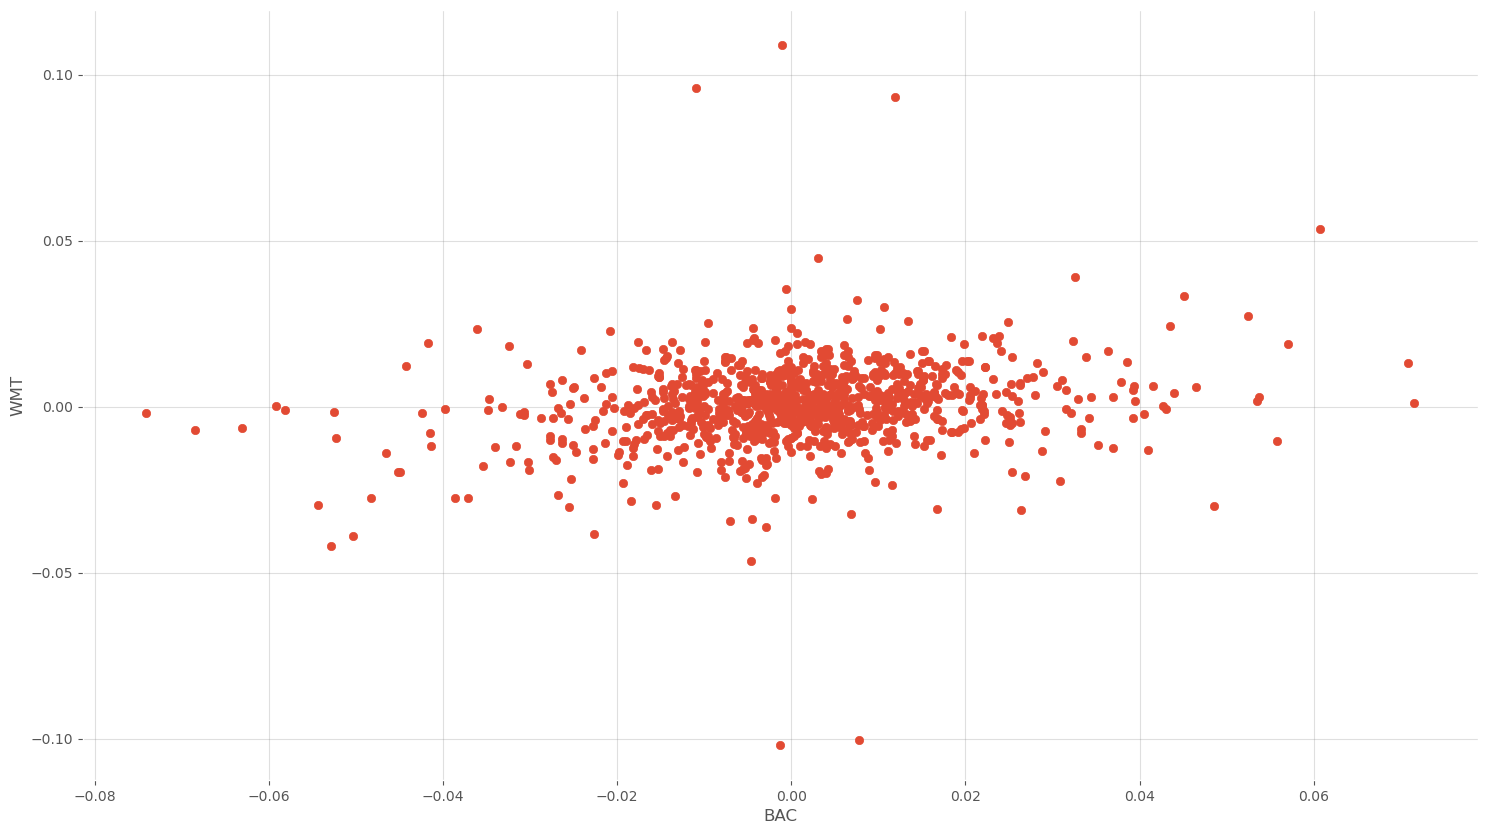

In [44]:
# stock of BAC and WMT
plt.figure(figsize = (16, 10))
scatter_plot('BAC', 'WMT')
plt.show()

In [45]:
print("According to the Scatter plot, the closest relationship between the stock of BAC and WMT.")

According to the Scatter plot, the closest relationship between the stock of BAC and WMT.


<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1600x1000 with 0 Axes>

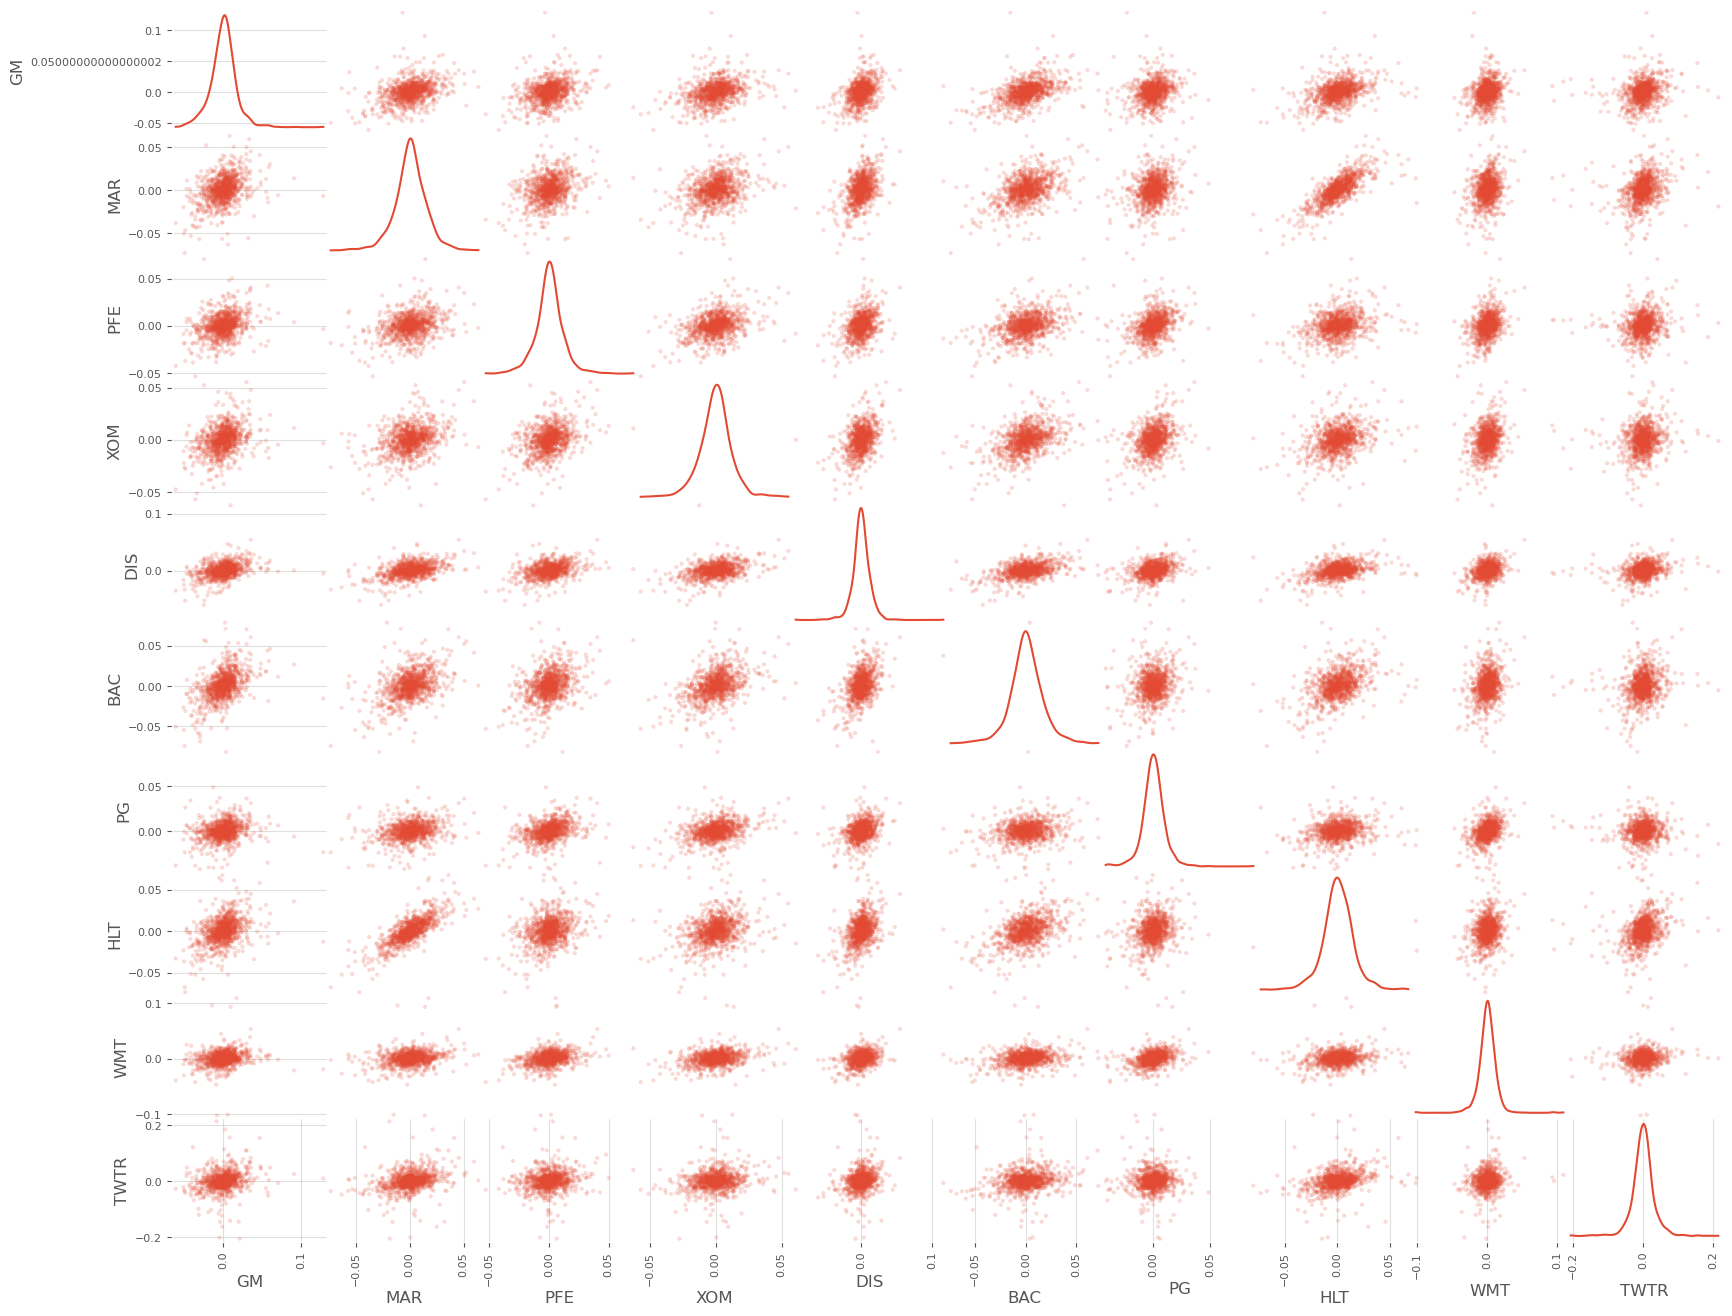

In [46]:
plt.figure(figsize = (16, 10))
scatter_matrix(simple_daily_pct_change, alpha = 0.2, diagonal = 'kde', figsize= (20, 16))
plt.show

### <font color = red> Answer 5 is presented in the cell below: </font>

### <font color = blue> 👉 Question 6. It is often useful to analyze stock performance against a market index such as the S&P 500. This will give a sense of how a stock price compares to movements in the overall market.

### Carry out the following analysis steps.

<font color = green>

> ### 1. Extract the S&P 500 (`^GSPC`) data for the same time period used for the stocks in Question 1.

> ### 2. In order to perform comparisons, you must run the same calculations to derive the daily percentage changes and cumulative returns on the index. You might first want to concatenate the index calculations in the results of the calculations of the stocks with respect to daily percentage changes. The process will lead you to efficiently compare the overall set of stocks and index calculations for daily percentage changes.

> ### 3. Calculate the cumulative daily returns.

> ### 4. To complete this analysis, calculate the correlation of the daily percentage change values.

> ### 5. Using location accessor, print only the correlational coefficients of each stock relative to the S&P 500, in descending order.

</font> 
        
### Which stock price moved in the most similar way to the S&P 500? Which moved in the least similar way?

### Below are the lines of code that lead to an answer:

In [70]:
ticker = ['^GSPC']

In [71]:
dataframe = pdr.DataReader(ticker, 'yahoo', dt.datetime(2015, 7, 1), dt.datetime(2019, 6, 30))['Close']
dataframe

Symbols           ^GSPC
Date                   
2015-06-30  2063.110107
2015-07-01  2077.419922
2015-07-02  2076.780029
2015-07-06  2068.760010
2015-07-07  2081.340088
...                 ...
2019-06-24  2945.350098
2019-06-25  2917.379883
2019-06-26  2913.780029
2019-06-27  2924.919922
2019-06-28  2941.760010

[1007 rows x 1 columns]

In [72]:
simple_daily_pct_change_sp500 = dataframe.pct_change()
simple_daily_pct_change_sp500

Symbols        ^GSPC
Date                
2015-06-30       NaN
2015-07-01  0.006936
2015-07-02 -0.000308
2015-07-06 -0.003862
2015-07-07  0.006081
...              ...
2019-06-24 -0.001732
2019-06-25 -0.009496
2019-06-26 -0.001234
2019-06-27  0.003823
2019-06-28  0.005757

[1007 rows x 1 columns]

In [73]:
frame = [simple_daily_pct_change, simple_daily_pct_change_sp500]
simple_daily_pct_change = pd.concat(frame, axis = 1)
simple_daily_pct_change

Symbols           GM       MAR       XOM       DIS       BAC        PG  \
Date                                                                     
2015-06-30       NaN       NaN       NaN       NaN       NaN       NaN   
2015-07-01 -0.008701  0.008066 -0.009976  0.008674  0.011751  0.018916   
2015-07-02  0.005751 -0.002534  0.009348 -0.001390 -0.011034  0.002634   
2015-07-06 -0.017454 -0.006551 -0.007337  0.006349 -0.005285  0.001501   
2015-07-07  0.006432  0.015207  0.004120  0.012100 -0.014758  0.020862   
...              ...       ...       ...       ...       ...       ...   
2019-06-25  0.019481 -0.025446 -0.008837  0.005172 -0.007863 -0.005430   
2019-06-26  0.011943  0.017782  0.004327  0.003287  0.005403 -0.017812   
2019-06-27  0.004983  0.019462 -0.010183 -0.007835  0.010749  0.000456   
2019-06-28  0.005480  0.014462  0.010683  0.002441  0.028004 -0.001184   
2019-07-01  0.005710  0.006700 -0.000913  0.014394  0.014483  0.007661   

Symbols          HLT       WMT      TWTR  PFE     ^GSPC  
Date                                                     
2015-06-30       NaN       NaN       NaN  NaN       NaN  
2015-07-01  0.008348  0.013393 -0.022639  NaN  0.006936  
2015-07-02  0.000000 -0.000278  0.009040  NaN -0.000308  
2015-07-06  0.000720  0.009324 -0.008119  NaN -0.003862  
2015-07-07  0.001799  0.017372  0.002540  NaN  0.006081  
...              ...       ...       ...  ...       ...  
2019-06-25 -0.023662 -0.004675 -0.024171  NaN -0.009496  
2019-06-26  0.013619 -0.005058  0.014401  NaN -0.001234  
2019-06-27  0.021265 -0.000545 -0.013345  NaN  0.003823  
2019-06-28  0.012535  0.003542  0.004317  NaN  0.005757  
2019-07-01  0.015961  0.001177  0.033811  NaN       NaN  

[1008 rows x 11 columns]

In [77]:
corr_matrix = simple_daily_pct_change.corr()
correlation = corr_matrix.loc["^GSPC"]

### <font color = red> Answer 6 is presented in the cell below: </font>

In [78]:
correlation.sort_values(ascending=False)

Symbols
^GSPC    1.000000
BAC      0.696512
MAR      0.640944
XOM      0.637954
HLT      0.613343
DIS      0.579061
GM       0.537411
PG       0.470668
WMT      0.408100
TWTR     0.348998
PFE           NaN
Name: ^GSPC, dtype: float64

### <font color = blue> 👉 Question 7. One common type of data visualization in finance is a stock’s trading volume relative to its closing price.

### Create a chart below after obtaining the data from Yahoo Finance!, using `pandas.datareader`. The target symbol is `AMZN`, and our period of interest is between January 2007 and December 2009. 

In [50]:
dataframe = pdr.DataReader('AMZN', 'yahoo', dt.datetime(2007, 1, 1), dt.datetime(2009, 12, 31))

In [51]:
import plotly.graph_objs as go

In [52]:
CLOSE_OT = go.Scatter(x = dataframe.index, y = dataframe.Close)

In [53]:
go.Figure(CLOSE_OT)

In [54]:
CS = [go.Candlestick(x = dataframe.index, 
                    open = dataframe.Open, 
                    high = dataframe.High, 
                    low = dataframe.Low, 
                    close = dataframe.Close)]

go.Figure(CS)

In [55]:
CS = [go.Candlestick(x = SP500.Date,
                     open = SP500.Open,
                     high = SP500.High,
                     low = SP500.Low,
                     close = SP500.Close)]
go.Figure(CS)

NameError: name 'SP500' is not defined

### Below are the lines of code that lead to an answer:

### <font color = red> Answer 7 is presented in the cell below: </font>

## 👇 <font color = "purple"> Bigger Question 8. 

### Please create a predictive model for the weekly return of NFLX stock. You will use supervised learning for your predictive modelling.

> As you learned in class, to do this it is essential to know what factors are related to Netflix’s stock price, and to incorporate as much information as you can into the model.

> Among the three major factors (correlated assets, technical indicators, and fundamental analysis), you will use correlated assets and technical indicators as features here.

    Step 1. Use 75% of your data for the training of your algorithm, and 25% for the testing set.

    Step 2. For your feature engineering...
    
> Our operational definition of `outcome` (`Y`) is the weekly return of Netflix (NFLX). The number of trading days in a week is assumed to be five, and we compute the return using five trading days. 
<br>
    
* <font color = "green"> NOTE: The lagged five-day variables embed the time series component by using a time-delay approach, where the lagged variable is included as one of the predictor variables. This step translates the time series data into a supervised regression-based model framework.
<br>    
    
> For `input features` (`predictors`; `Xs`), we use (The variables used as predictors are as follows) ...

> `Correlated assets`

* lagged five-day returns of stocks (META, APPLE, AMZN, GOOGL);
* currency exchange rates (USD/JPY and GBP/USD);
* indices (S&P 500, Dow Jones, and VIX);
* lagged five-day, 15-day, 30-day, and 60-day returns of NFLX.

> `Technical indicators`

* 21-day, 63-day, and 252-day moving averages;
* 10-day, 30-day, and 200-day exponential moving averages;
* 10-day, 30-day, and 200-day relative strength index;
* stochastic oscillator %K and %D (using rolling windows of 10-, 30-, 200-day);
* rate of change (using 10-, 30-day past prices).
    
    
    Step 3. For your algorithm of choices, please assess the model performance of the following algorithms: 

    
* Linear Regression
* Elastic Net
* LASSO
* Support Vector Machine
* K-Nearest Neighbor
* ARIMA
* Decision Tree
* Extra Trees 
* Random Forest
* Gradient Boosting Tree
* Adaptive Boosting
    
    
    Step 4. For this exercise, hyperparameter tuning is not requested. 
    
    Step 5. But make sure to compare the model performance of the above algorithms.

> The metric for assessing model performance will be mean squared error (`MSE`).
<br>

> Show which of the algorithms perform relatively better by a comparison visualization of performance, for both the training and testing sets learned in class. 

    Step 6. Using the model of your choice, please visualize the actual vs. predicted (estimated) data.

### Below are the lines of code that lead to an answer:

In [79]:
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn.tree import DecisionTreeRegressor

from sklearn.neighbors import KNeighborsRegressor

from sklearn.svm import SVR

# Bagging
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor

# Boosting
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.neural_network import MLPRegressor

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error

from sklearn.feature_selection import chi2, f_regression
from sklearn.feature_selection import SelectKBest

In [81]:
import statsmodels.tsa.arima.model as stats
import statsmodels.api as sm

In [82]:
from pandas.plotting import scatter_matrix
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from statsmodels.graphics.tsaplots import plot_acf

In [98]:
stock_ticker = ['NFLX', 'META', 'AAPL', 'AMZN', 'GOOGL']
currency_ticker = ["DEXJPUS", "DEXUSUK"]
index_ticker = ["SP500", "DJIA", "VIXCLS"]

stock_data = pdr.DataReader(stock_ticker, "yahoo")
currency_data = pdr.DataReader(currency_ticker, "fred")
index_data = pdr.DataReader(index_ticker, "fred")

NFLX_df = pdr.DataReader('NFLX', 'yahoo')

In [158]:
index_data

SP500      DJIA  VIXCLS
DATE                                 
2017-11-09  2584.62  23461.94   10.50
2017-11-10  2582.30  23422.21   11.29
2017-11-13  2584.84  23439.70   11.50
2017-11-14  2578.87  23409.47   11.59
2017-11-15  2564.62  23271.28   13.13
...             ...       ...     ...
2022-11-01  3856.10  32653.20   25.81
2022-11-02  3759.69  32147.76   25.86
2022-11-03  3719.89  32001.25   25.30
2022-11-04  3770.55  32403.22   24.55
2022-11-07  3806.80  32827.00     NaN

[1303 rows x 3 columns]

In [88]:
return_period = 5

In [99]:
Y = np.log(stock_data.loc[:, ("Adj Close", "NFLX")]).diff(return_period).shift(-return_period)
Y.name = Y.name[-1]+"_pred"

Date
2017-11-08   -0.022237
2017-11-09    0.008269
2017-11-10    0.006126
2017-11-13   -0.005036
2017-11-14    0.002653
                ...   
2022-11-01         NaN
2022-11-02         NaN
2022-11-03         NaN
2022-11-04         NaN
2022-11-07         NaN
Name: NFLX_pred, Length: 1258, dtype: float64

In [159]:
X1 = np.log(stock_data.loc[:, ("Adj Close", ("META", "AAPL", 'AMZN', 'GOOGL')
                               )
                          ]
            ).diff(return_period)
X1.columns = X1.columns.droplevel()

X2 = np.log(currency_data).diff(return_period)
X3 = np.log(index_data).diff(return_period)

X4 = pd.concat([np.log(stock_data.loc[:, ("Adj Close", "NFLX")
                                     ]
                      ).diff(i) for i in [return_period, return_period * 3, return_period * 6, return_period * 12
                                         ]
               ], axis = 1
              ).dropna()

X4.columns = ["NFLX_DT", "NFLX_3DT", "NFLX_6DT", "NFLX_12DT"]

X = pd.concat([X1, X2, X3, X4], axis = 1)
X

META      AAPL      AMZN     GOOGL   DEXJPUS   DEXUSUK  \
2017-11-08       NaN       NaN       NaN       NaN       NaN       NaN   
2017-11-09       NaN       NaN       NaN       NaN       NaN       NaN   
2017-11-10       NaN       NaN       NaN       NaN       NaN       NaN   
2017-11-13       NaN       NaN       NaN       NaN       NaN       NaN   
2017-11-14       NaN       NaN       NaN       NaN       NaN       NaN   
...              ...       ...       ...       ...       ...       ...   
2022-11-01 -0.367717 -0.011156 -0.219936 -0.143977  0.001757 -0.000785   
2022-11-02 -0.360357 -0.029352 -0.227563 -0.087577  0.004155 -0.012824   
2022-11-03 -0.096730 -0.041743 -0.217168 -0.100169  0.014684 -0.034366   
2022-11-04 -0.088589 -0.116527 -0.128062 -0.106296 -0.003120 -0.025732   
2022-11-07  0.037502 -0.097102 -0.123596 -0.065816       NaN       NaN   

               SP500      DJIA    VIXCLS   NFLX_DT  NFLX_3DT  NFLX_6DT  \
2017-11-08       NaN       NaN       NaN       NaN       NaN       NaN   
2017-11-09       NaN       NaN       NaN       NaN       NaN       NaN   
2017-11-10       NaN       NaN       NaN       NaN       NaN       NaN   
2017-11-13       NaN       NaN       NaN       NaN       NaN       NaN   
2017-11-14       NaN       NaN       NaN       NaN       NaN       NaN   
...              ...       ...       ...       ...       ...       ...   
2022-11-01 -0.000780  0.025322 -0.097738 -0.014781  0.291281  0.166167   
2022-11-02 -0.018685  0.009647 -0.053456 -0.089700  0.211898  0.141960   
2022-11-03 -0.023226 -0.001000 -0.079374 -0.098596  0.146001  0.126663   
2022-11-04 -0.034027 -0.014053 -0.047723 -0.125698  0.125636  0.141368   
2022-11-07 -0.016977  0.002869       NaN -0.121060  0.053616  0.143324   

            NFLX_12DT  
2017-11-08        NaN  
2017-11-09        NaN  
2017-11-10        NaN  
2017-11-13        NaN  
2017-11-14        NaN  
...               ...  
2022-11-01   0.205471  
2022-11-02   0.171653  
2022-11-03   0.097315  
2022-11-04   0.071889  
2022-11-07   0.036625  

[1304 rows x 13 columns]

In [95]:
# Moving Average
def MA(df, n):
    MA = pd.Series(df['Adj Close'].rolling(window = n, min_periods = n).mean(), 
                  name = "MA_" + str(n))
    return MA

In [105]:
X['MA_21'] = MA(NFLX_df, 21)
X['MA_63'] = MA(NFLX_df, 63)
X['MA_252'] = MA(NFLX_df, 252)

In [106]:
def EMA(df, n):
    EMA = pd.Series(df['Adj Close'].ewm(span = n, 
                                       min_periods = n).mean(), 
                   name = 'EMA_' + str(n))
    
    return EMA

In [110]:
X['EMA_10'] = EMA(NFLX_df, 10)
X['EMA_30'] = EMA(NFLX_df, 30)
X['EMA_200'] = EMA(NFLX_df, 200)

In [109]:
def RSI(series, period):
    delta = series.diff().dropna()
    u = delta * 0
    d = u.copy()
    
    u[delta > 0] = delta[delta > 0]
    d[delta < 0] = -delta[delta < 0]
    
    u[u.index[period - 1]] = np.mean(u[:period])
    
    u = u.drop(u.index[:(period - 1)
                      ]
              )
    d[d.index[period - 1]] = np.mean(d[:period])
    d = d.drop(d.index[:(period - 1)
                      ]
              )
    rs = u.ewm(com = period - 1, adjust = False).mean() / \
    d.ewm(com = period - 1, adjust = False).mean()
    
    return 100 - 100 / (1 + rs)

In [113]:
X['RSI_10'] = RSI(NFLX_df['Adj Close'], 10)
X['RSI_30'] = RSI(NFLX_df['Adj Close'], 30)
X['RSI_200'] = RSI(NFLX_df['Adj Close'], 200)

In [114]:
# Stochastic Oscillator

def STOK(close, low, high, n):
    STOK = ((close - low.rolling(n).min()) / \
            (high.rolling(n).max() - low.rolling(n).min()
            )
           ) * 100
    
    return STOK

def STOD(close, low, high, n):
    STOK = ((close - low.rolling(n).min()) / \
            (high.rolling(n).max() - low.rolling(n).min()
            )
           ) * 100
    
    STOD = STOK.rolling(3).mean()
    return STOD

In [115]:
NFLX_df['%K10'] = STOK(NFLX_df['Adj Close'], NFLX_df['Low'], NFLX_df['High'], 10)
NFLX_df['%D10'] = STOD(NFLX_df['Adj Close'], NFLX_df['Low'], NFLX_df['High'], 10)

NFLX_df['%K30'] = STOK(NFLX_df['Adj Close'], NFLX_df['Low'], NFLX_df['High'], 30)
NFLX_df['%D30'] = STOD(NFLX_df['Adj Close'], NFLX_df['Low'], NFLX_df['High'], 30)

NFLX_df['%K200'] = STOK(NFLX_df['Adj Close'], NFLX_df['Low'], NFLX_df['High'], 200)
NFLX_df['%D200'] = STOD(NFLX_df['Adj Close'], NFLX_df['Low'], NFLX_df['High'], 200)

In [118]:

def ROC(df, n):
    M = df.diff(n - 1)
    N = df.shift(n - 1)
    ROC = pd.Series((M / N) * 100, 
                    name = "RoC_" + str(n)
                   )
    
    return ROC

In [120]:
NFLX_df['ROC_10'] = ROC(NFLX_df['Adj Close'], 10)
NFLX_df['ROC_30'] = ROC(NFLX_df['Adj Close'], 30)

In [121]:
data = pd.concat([Y, X], axis = 1).dropna().\
iloc[: :return_period, :]

In [122]:
Y = data.loc[:, Y.name]
X = data.loc[:, X.columns]

In [125]:
# step 1 data split
validation_size = 0.25

train_size = int(len(X) * (1 - validation_size))

X_train = X[0:train_size]
X_test = X[train_size:len(X)]

Y_train = Y[0: train_size]
Y_test = Y[train_size:len(Y)]

In [138]:
num_folds = 11
seed = 7
scoring = 'neg_mean_squared_error'

In [139]:
models = []

In [140]:
# Linear regression
models.append(("LR", LinearRegression()))

# Elastic Net
models.append(("EN", ElasticNet()))

# LASSO
models.append(("LASSO", Lasso()))

# Support Vector Machine
models.append(("SVR", SVR()))

# K-Nearest Neighbor
models.append(("KNN", KNeighborsRegressor()))

# Decision Tree
models.append(("CART", DecisionTreeRegressor()))

# Extra Trees
models.append(("ETR", ExtraTreesRegressor()))

# Random Forest
models.append(("RFR", RandomForestRegressor()))

# Gradient Boosting Tree
models.append(("GBR", GradientBoostingRegressor()))

# Adaptive Boosting
models.append(("ABR", AdaBoostRegressor()))

In [141]:
import warnings
warnings.filterwarnings("ignore")

In [142]:
names = []

kfold_results = []

train_results = []
test_results = []

for name, model in models:
    names.append(name)
    
    # K-fold analysis
    kfold = KFold(n_splits = num_folds, 
                 random_state = seed, shuffle=True)
    
    # Let's convert MSE to positive
    
    cv_results = -1 * cross_val_score(model, X_train, Y_train, 
                                     cv = kfold, 
                                     scoring = scoring)
    kfold_results.append(cv_results)
    
    res = model.fit(X_train, Y_train)
    train_result = mean_squared_error(res.predict(X_train), Y_train)
    train_results.append(train_result)
    
    test_result = mean_squared_error(res.predict(X_test), Y_test)
    test_results.append(test_result)
    
    message = "%s: %f (%f) %f %f" % (name, cv_results.mean(), cv_results.std(), train_result, test_result)
    print(message)

LR: 0.003508 (0.001389) 0.002174 0.019690
EN: 0.002984 (0.001290) 0.002879 0.012324
LASSO: 0.002981 (0.001288) 0.002879 0.012324
SVR: 0.003457 (0.001540) 0.002876 0.014301
KNN: 0.003179 (0.001115) 0.001995 0.012957
CART: 0.005533 (0.003306) 0.000000 0.027829
ETR: 0.003339 (0.001455) 0.000000 0.013775
RFR: 0.003313 (0.001459) 0.000473 0.013477
GBR: 0.003887 (0.001784) 0.000109 0.015419
ABR: 0.003346 (0.001405) 0.001042 0.013284


In [143]:
X_train_ARIMA = X_train.loc[:, 
                           ['META', 'AAPL', 'AMZN', 'GOOGL', "DEXJPUS", "DEXUSUK", "SP500", "DJIA", "VIXCLS"]]

X_test_ARIMA = X_test.loc[:, 
                           ['META', 'AAPL', 'AMZN', 'GOOGL', "DEXJPUS", "DEXUSUK", "SP500", "DJIA", "VIXCLS"]]

train_len = len(X_train_ARIMA)
test_len = len(X_test_ARIMA)
total_len = len(X)

In [144]:
modelARIMA = stats.ARIMA(endog = Y_train, exog = X_train_ARIMA, order = [1, 0, 0])

model_fit = modelARIMA.fit()

In [145]:
error_Training_ARIMA = mean_squared_error(Y_train, model_fit.fittedvalues)

predicted = model_fit.predict(start = train_len - 1, 
                             end = total_len - 1, 
                             exog = X_test_ARIMA)[1:]

error_Test_ARIMA = mean_squared_error(Y_test, 
                                     predicted)

error_Test_ARIMA

0.013169261839803057

In [146]:
test_results.append(error_Test_ARIMA)

train_results.append(error_Training_ARIMA)

names.append("ARIMA")

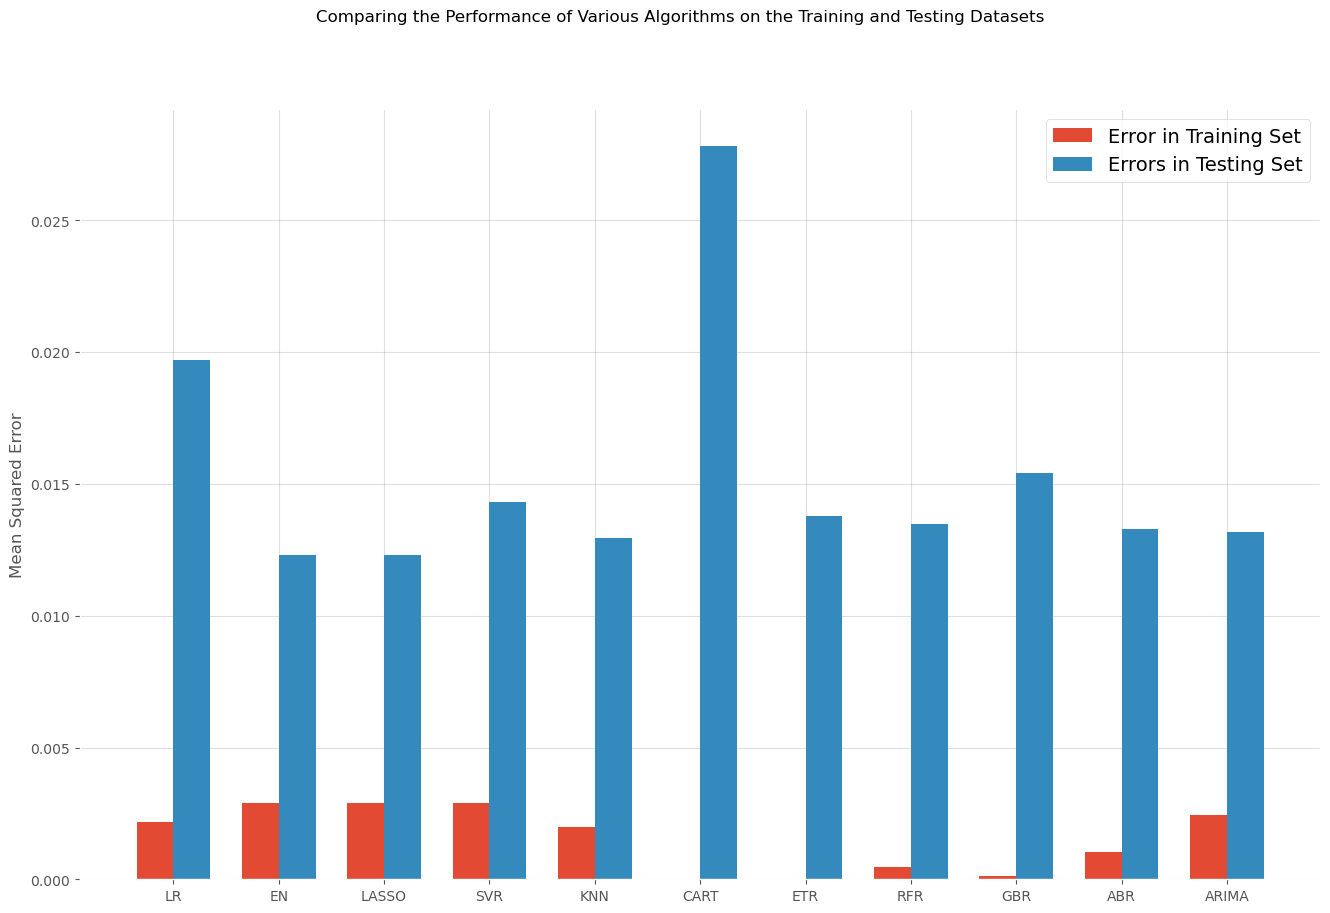

In [147]:
fig = plt.figure(figsize = (16, 10))

ind = np.arange(len(names))

width = 0.35

fig.suptitle("Comparing the Performance of Various Algorithms on the Training and Testing Datasets")
ax = fig.add_subplot(111)

plt.bar(ind - width / 2, 
       train_results, 
       width = width, 
       label = 'Error in Training Set')

plt.bar(ind + width / 2, 
       test_results, 
       width = width, 
       label = 'Errors in Testing Set')

plt.legend()

ax.set_xticks(ind)
ax.set_xticklabels(names)

plt.ylabel("Mean Squared Error")

plt.show()

In [151]:
model = Lasso()

res = model.fit(X_train, Y_train)

predict_value = res.predict(X_test)[1:]

predict_value = pd.DataFrame(predict_value)

predict_value.index = Y_test.index[1:]

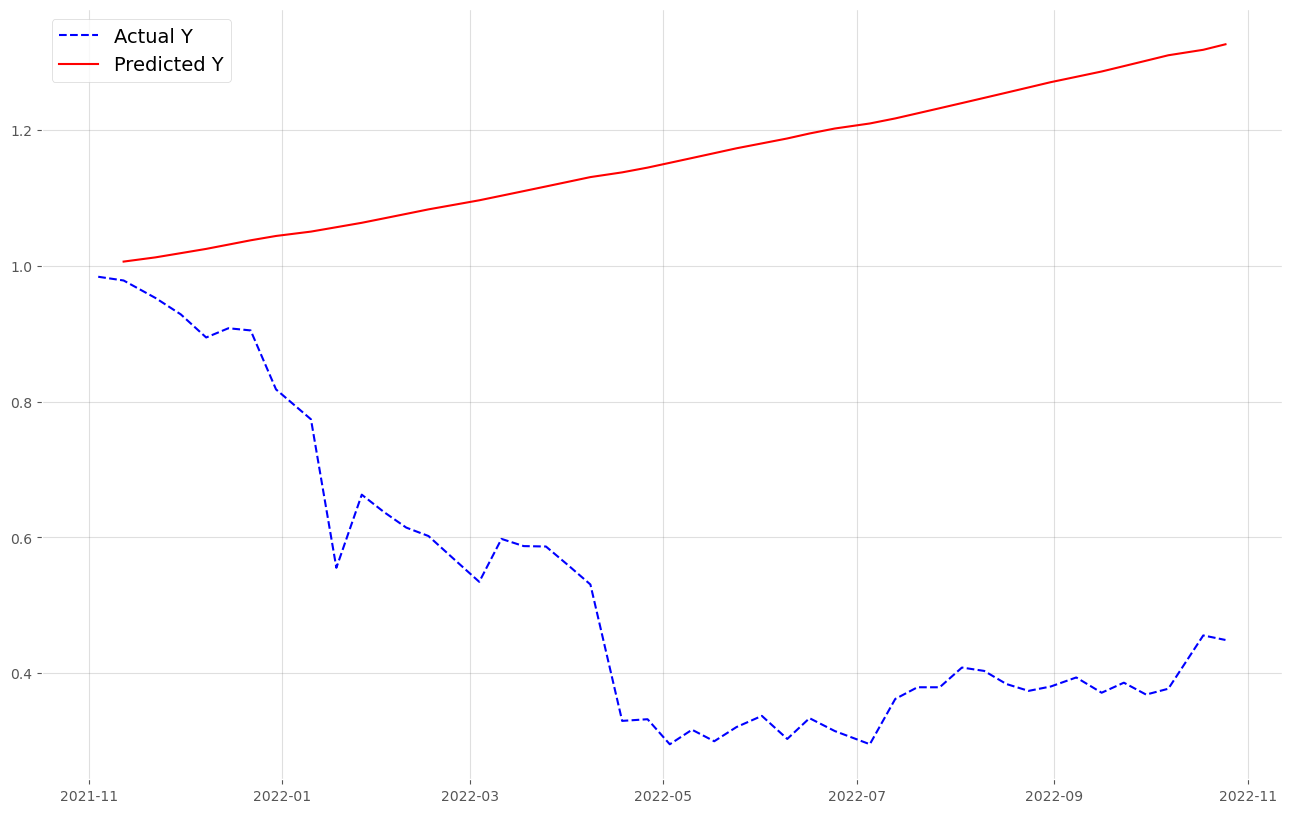

In [152]:
plt.figure(figsize = (16, 10))

plt.plot(np.exp(Y_test).cumprod(), 'b--', 
         label = 'Actual Y')

plt.plot(np.exp(predict_value).cumprod(), 'r', 
        label = "Predicted Y")

plt.legend()

plt.show()

### <font color = red> Answer 8 is presented in the cell below: </font>

> 💯 “Thank you for putting your efforts into the individual assessment questions” 😊